<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/gradient_fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

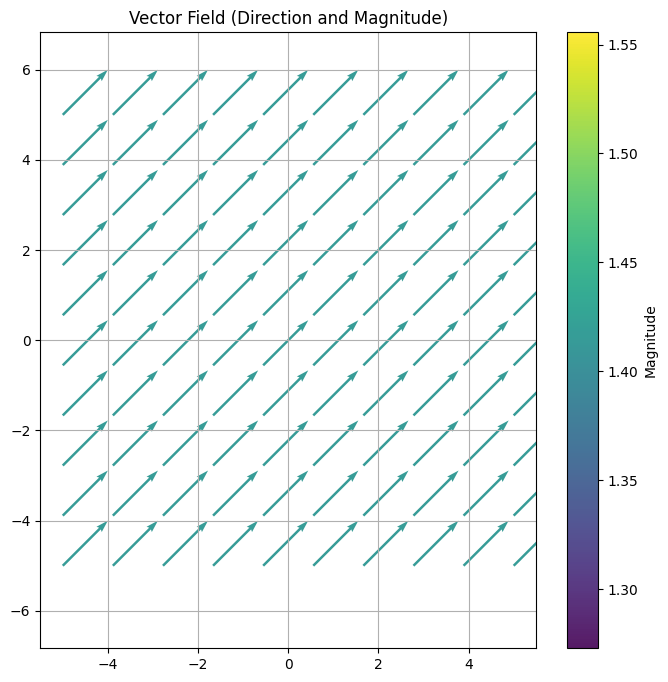

In [ ]:
# f(x) = x
import numpy as np
import matplotlib.pyplot as plt

def f(x): return x
def grad_f(x): return 1

# plot quiver plot with grradient in right direction and arrows in the right direction
X = np.linspace(-5, 5, 10)
Y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(X, Y)
U = grad_f(X)
V = grad_f(Y)

plt.figure(figsize=(8, 8))
plt.quiver(
    X, Y,        # Grid coordinates
    U, V,        # Vector components
    np.sqrt(U**2 + V**2),  # Color magnitude
    angles='xy', scale_units='xy', scale=1,  # Proper scaling
    width=0.005, headwidth=3, headlength=5,
    cmap='viridis', alpha=0.9
)
plt.colorbar(label="Magnitude")
plt.axis('equal')
plt.grid(True)
plt.title("Vector Field (Direction and Magnitude)")
plt.show()


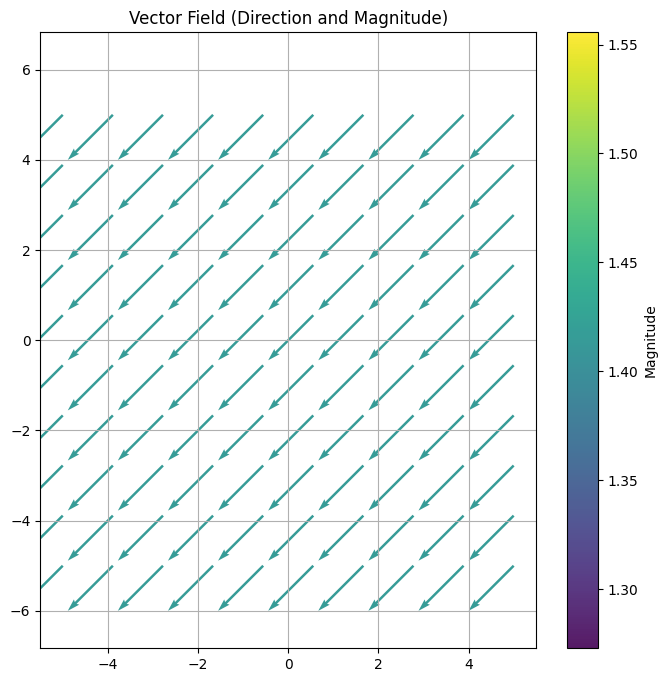

In [ ]:
# f(x) = -x
import numpy as np
import matplotlib.pyplot as plt

def f(x): return -x
def grad_f(x): return -1

# plot quiver plot with grradient in right direction and arrows in the right direction
X = np.linspace(-5, 5, 10)
Y = np.linspace(-5, 5, 10)
X, Y = np.meshgrid(X, Y)
U = grad_f(X)
V = grad_f(Y)

plt.figure(figsize=(8, 8))
plt.quiver(
    X, Y,        # Grid coordinates
    U, V,        # Vector components
    np.sqrt(U**2 + V**2),  # Color magnitude
    angles='xy', scale_units='xy', scale=1,  # Proper scaling
    width=0.005, headwidth=3, headlength=5,
    cmap='viridis', alpha=0.9
)
plt.colorbar(label="Magnitude")
plt.axis('equal')
plt.grid(True)
plt.title("Vector Field (Direction and Magnitude)")
plt.show()


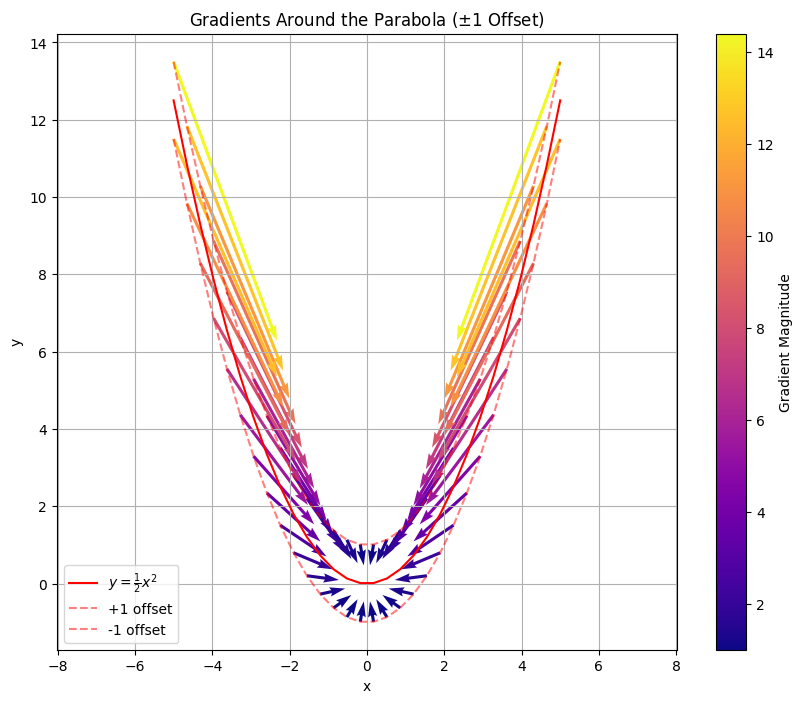

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and gradient
eta = 0.5
def f(x): return 0.5 * x**2
def grad_f(x): return x  # Gradient of 0.5 x^2 is x but in the opposite direction of eta

# Define x range and offset
x_vals = np.linspace(-5, 5, 30)
parabola = f(x_vals)
offset_above = parabola + 1
offset_below = parabola - 1

# Stack all vector positions (x, y) from both offset curves
X = np.concatenate([x_vals, x_vals])
Y = np.concatenate([offset_above, offset_below])

# Gradient at each (x, y) — use gradient of x only, since grad(f) = [x, y]
U = -grad_f(X)
V = -grad_f(Y)  # gradient of 0.5 * y^2 is y (for visual symmetry)

# Plotting
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, np.hypot(U, V), cmap='plasma', scale=30, width=0.005)
plt.plot(x_vals, parabola, 'r-', label=r"$y = \frac{1}{2}x^2$")
plt.plot(x_vals, offset_above, 'r--', alpha=0.5, label="+1 offset")
plt.plot(x_vals, offset_below, 'r--', alpha=0.5, label="-1 offset")

plt.colorbar(label="Gradient Magnitude")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Gradients Around the Parabola ($\pm1$ Offset)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


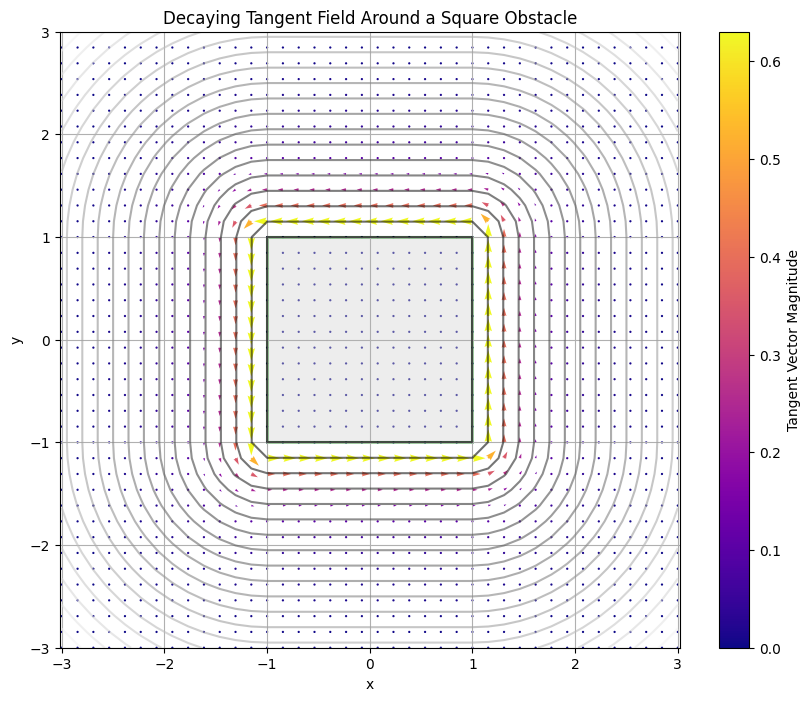

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Distance function from square
def f_square(x, y, a=1.0):
    dx = np.maximum(np.abs(x) - a, 0)
    dy = np.maximum(np.abs(y) - a, 0)
    return np.sqrt(dx**2 + dy**2)

# Gradient of square distance
def grad_f_square(x, y, a=1.0):
    dx = np.maximum(np.abs(x) - a, 0)
    dy = np.maximum(np.abs(y) - a, 0)
    norm = np.sqrt(dx**2 + dy**2) + 1e-12

    dfdx = np.where(np.abs(x) > a, (dx / norm) * np.sign(x), 0.0)
    dfdy = np.where(np.abs(y) > a, (dy / norm) * np.sign(y), 0.0)
    return dfdx, dfdy

# Grid
x_vals = np.linspace(-3, 3, 40)
y_vals = np.linspace(-3, 3, 40)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate scalar field and gradient
Z = f_square(X, Y, a=1.0)
dZ_dx, dZ_dy = grad_f_square(X, Y, a=1.0)

# Rotate gradient by +90 degrees to get tangent vectors
U_raw = -dZ_dy
V_raw =  dZ_dx

# Decaying magnitude factor (strong near square, fades away)
alpha = 3.0
decay = np.exp(-alpha * Z)

# Apply decay to tangent vectors
U = U_raw * decay
V = V_raw * decay

# Plot
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=20, cmap='gray', alpha=0.6)
plt.quiver(X, Y, U, V, np.hypot(U, V), cmap='plasma', scale=30, width=0.004)

# Green-bordered square
square = plt.Rectangle((-1, -1), 2, 2, edgecolor='green', facecolor='lightgray', lw=2, alpha=0.4)
plt.gca().add_patch(square)

plt.colorbar(label="Tangent Vector Magnitude")
plt.axis('equal')
plt.grid(True)
plt.title("Decaying Tangent Field Around a Square Obstacle")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


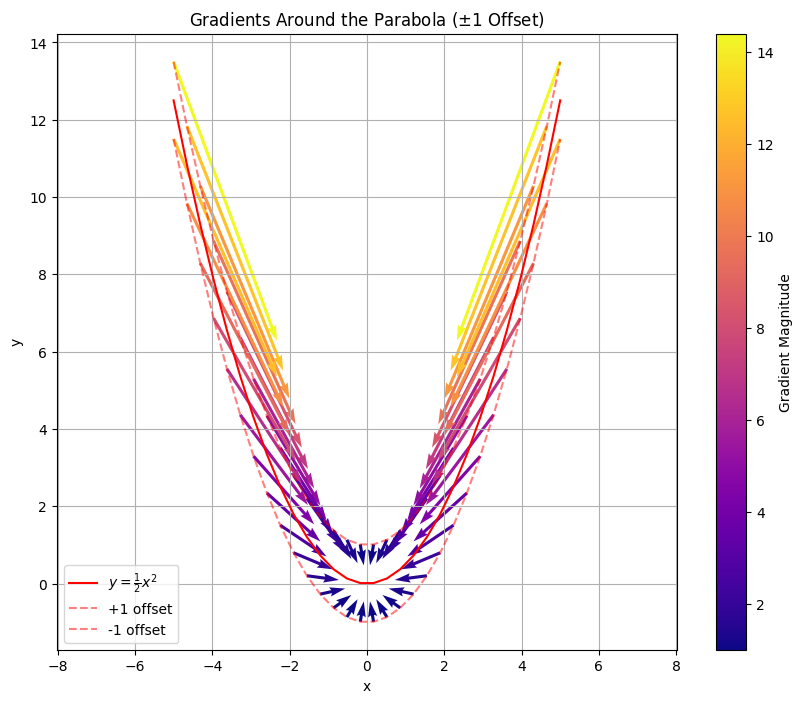

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and gradient
eta = 0.5
def f(x): return 0.5 * x**2
def grad_f(x): return x  # Gradient of 0.5 x^2 is x but in the opposite direction of eta

# Define x range and offset
x_vals = np.linspace(-5, 5, 30)
parabola = f(x_vals)
offset_above = parabola + 1
offset_below = parabola - 1

# Stack all vector positions (x, y) from both offset curves
X = np.concatenate([x_vals, x_vals])
Y = np.concatenate([offset_above, offset_below])

# Gradient at each (x, y) — use gradient of x only, since grad(f) = [x, y]
U = -grad_f(X)
V = -grad_f(Y)  # gradient of 0.5 * y^2 is y (for visual symmetry)

# Plotting
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, U, V, np.hypot(U, V), cmap='plasma', scale=30, width=0.005)
plt.plot(x_vals, parabola, 'r-', label=r"$y = \frac{1}{2}x^2$")
plt.plot(x_vals, offset_above, 'r--', alpha=0.5, label="+1 offset")
plt.plot(x_vals, offset_below, 'r--', alpha=0.5, label="-1 offset")

plt.colorbar(label="Gradient Magnitude")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title("Gradients Around the Parabola ($\pm1$ Offset)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


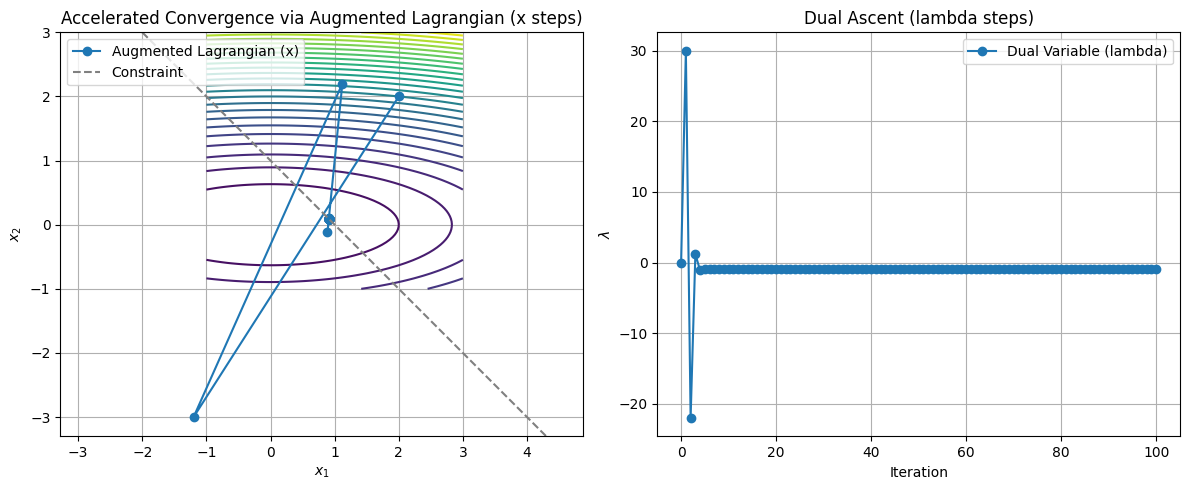

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective
def f(x): return 0.5 * x[0]**2 + 5 * x[1]**2

# Constraint
def g(x): return x[0] + x[1] - 1

# Gradient of f
def grad_f(x): return np.array([x[0], 10 * x[1]])

# Gradient of g
def grad_g(x): return np.array([1.0, 1.0])

# Augmented Lagrangian gradient descent with dual ascent
def augmented_lagrangian_method(x0, rho=10, max_iters=100, lr=0.1):
    x = x0.copy()
    lam = 0.0
    x_history = [x.copy()]
    lam_history = [lam]
    for _ in range(max_iters):
        # Gradient of augmented Lagrangian
        constraint_violation = g(x)
        grad = grad_f(x) + (lam + rho * constraint_violation) * grad_g(x)
        x -= lr * grad
        # Dual update (ascent)
        lam += rho * constraint_violation
        x_history.append(x.copy())
        lam_history.append(lam)
    return np.array(x_history), np.array(lam_history)

# Run
x0 = np.array([2.0, 2.0])
x_path, lam_path = augmented_lagrangian_method(x0)

# Plot
X, Y = np.meshgrid(np.linspace(-1, 3, 100), np.linspace(-1, 3, 100))
Z = 0.5 * X**2 + 5 * Y**2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.contour(X, Y, Z, levels=30)
ax1.plot(x_path[:,0], x_path[:,1], 'o-', label='Augmented Lagrangian (x)')
ax1.axline((0, 1), slope=-1, color='gray', linestyle='--', label='Constraint')
ax1.legend()
ax1.set_title("Accelerated Convergence via Augmented Lagrangian (x steps)")
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.grid(True)
ax1.axis('equal')

ax2.plot(lam_path, 'o-', label='Dual Variable (lambda)')
ax2.legend()
ax2.set_title("Dual Ascent (lambda steps)")
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\lambda$')
ax2.grid(True)


plt.tight_layout()
plt.show()

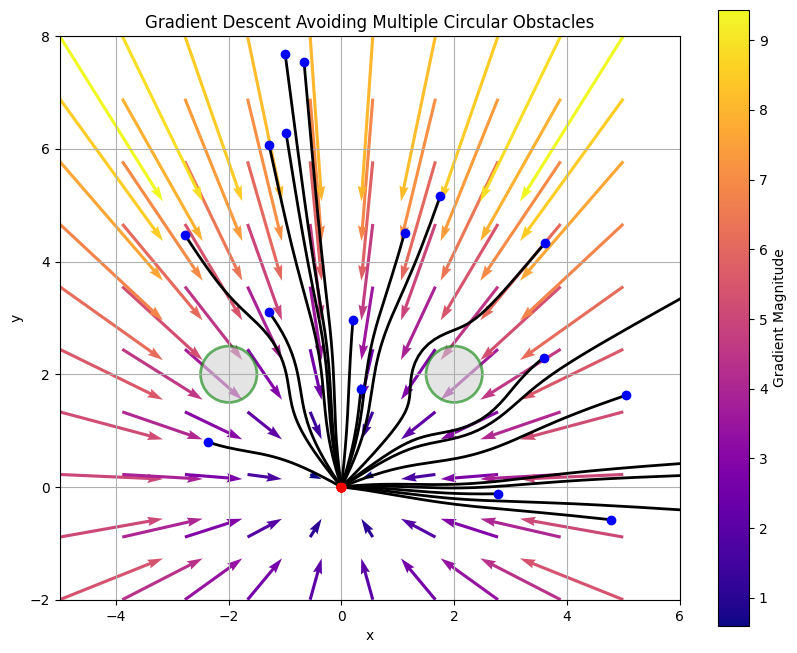

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Gradient of the parabola: f(x, y) = 0.5 x^2 + 0.5 y^2 ===
def grad_parabola(x, y):
    return x, y

# === Circle obstacle: distance and gradient ===
def circle_distance(x, y, cx, cy, r):
    return np.sqrt((x - cx)**2 + (y - cy)**2) - r

def circle_grad(x, y, cx, cy):
    dx = x - cx
    dy = y - cy
    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return dx / norm, dy / norm

# === Project gradient around multiple circles ===
def run_gd(start, circles, steps=5000, lr=0.05, alpha=1.1):
    x, y = start
    path = [(x, y)]
    for _ in range(steps):
        # Base descent direction
        gx, gy = grad_parabola(x, y)
        gx, gy = -gx, -gy

        # Initialize merged direction
        dx, dy = gx, gy

        # Merge with each circle's tangent projection
        for (cx, cy, r) in circles:
            dist = circle_distance(x, y, cx, cy, r)
            blend = np.exp(-alpha * dist)

            # Gradient of distance (outward normal)
            nx, ny = circle_grad(x, y, cx, cy)

            # Tangent vector (rotated normal)
            tx, ty = -ny, nx

            # Project original descent onto tangent
            dot = gx * tx + gy * ty
            gx_proj = dot * tx
            gy_proj = dot * ty

            # Blend into main direction
            dx = (1 - blend) * dx + blend * gx_proj
            dy = (1 - blend) * dy + blend * gy_proj

        # Step update
        x += lr * dx
        y += lr * dy
        path.append((x, y))
    return np.array(path)

# === Define multiple circles: (cx, cy, radius) ===
circles = [
    (2.0, 2.0, 0.5),
    (-2.0, 2.0, 0.5)
]

# === Starting points ===
np.random.seed(42)  # For reproducibility
starts = list(zip(
    np.random.uniform(-3, 8, 20),  # x range
    np.random.uniform(-1, 8, 20)   # y range
))

paths = [run_gd(p, circles) for p in starts]

# === Plot ===
plt.figure(figsize=(10, 8))

# Vector field
xv = np.linspace(-5, 5, 10)
yv = np.linspace(-2, 8, 10)
X, Y = np.meshgrid(xv, yv)
U = -X
V = -Y
plt.quiver(X, Y, U, V, np.hypot(U, V), cmap='plasma', scale=30, width=0.005)

# Plot circular obstacles
for (cx, cy, r) in circles:
    circle = plt.Circle((cx, cy), r, edgecolor='green', facecolor='lightgray', lw=2, alpha=0.6)
    plt.gca().add_patch(circle)

# Plot paths
for path in paths:
    plt.plot(path[:, 0], path[:, 1], 'k-', lw=2)
    plt.plot(path[0, 0], path[0, 1], 'bo')  # start
    plt.plot(path[-1, 0], path[-1, 1], 'ro')  # end

plt.title("Gradient Descent Avoiding Multiple Circular Obstacles")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlim(-5, 6)
plt.ylim(-2, 8)
plt.colorbar(label="Gradient Magnitude")
plt.show()


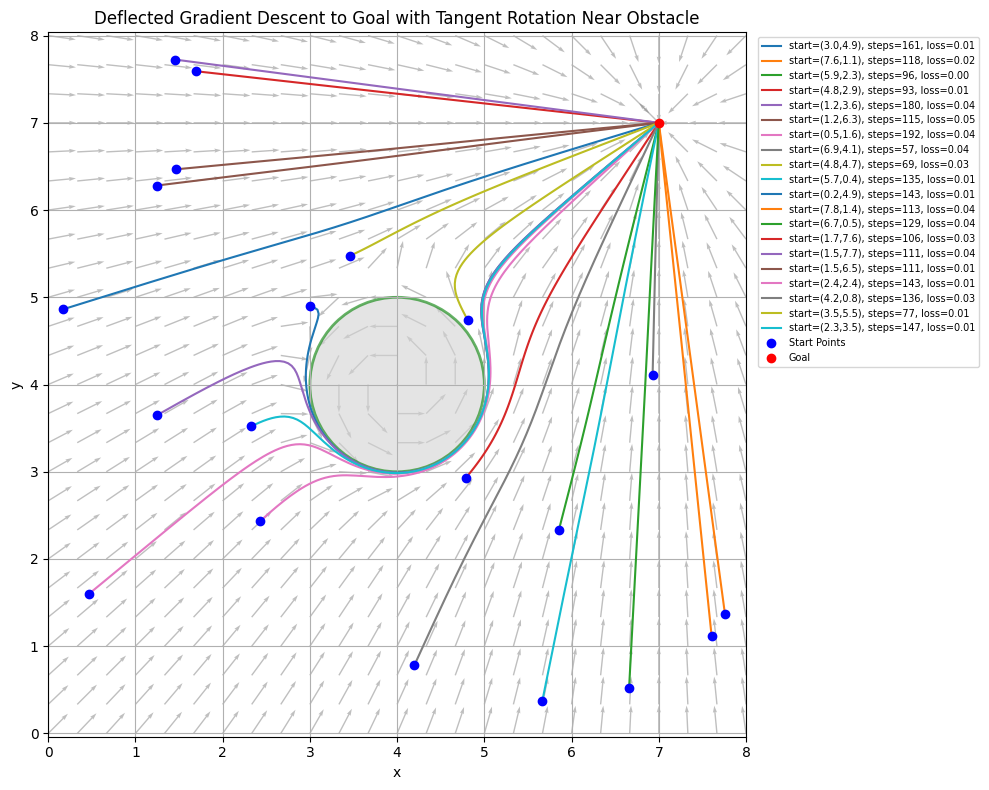

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Goal gradient ===
def goal_grad(x, y, gx=7.0, gy=7.0):
    dx = x - gx
    dy = y - gy
    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return -dx / norm, -dy / norm

# === Circle obstacle at (4,4), radius 1 ===
def distance_to_circle(x, y, cx=4.0, cy=4.0, r=1.0):
    return np.sqrt((x - cx)**2 + (y - cy)**2) - r

def outward_normal(x, y, cx=4.0, cy=4.0):
    dx = x - cx
    dy = y - cy
    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return dx / norm, dy / norm

# === Blended descent logic with tangent rotation ===
def rotated_descent(x, y, alpha=2.5):
    gx, gy = goal_grad(x, y)
    d = distance_to_circle(x, y)
    nx, ny = outward_normal(x, y)
    tx, ty = -ny, nx  # tangent direction

    blend = np.exp(-alpha * max(d, 0.0))
    dx = (1 - blend) * gx + blend * tx
    dy = (1 - blend) * gy + blend * ty

    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return dx / norm, dy / norm

# === Run gradient descent from a point ===
def run_descent(x0, y0, steps=300, lr=0.05):
    path = [(x0, y0)]
    x, y = x0, y0
    for _ in range(steps):
        dx, dy = rotated_descent(x, y)
        x += lr * dx
        y += lr * dy
        path.append((x, y))
        if np.hypot(x - 7, y - 7) < 0.05:
            break
    return np.array(path)

# === Generate 20 random start points ===
np.random.seed(42)
starts = list(zip(
    np.random.uniform(0, 8, 20),
    np.random.uniform(0, 8, 20)
))

# === Run descent from each start point ===
paths = [run_descent(x0, y0) for (x0, y0) in starts]

# === Plotting ===
plt.figure(figsize=(10, 8))

# Vector field for reference
x_vals = np.linspace(0, 8, 25)
y_vals = np.linspace(0, 8, 25)
X, Y = np.meshgrid(x_vals, y_vals)
U, V = np.zeros_like(X), np.zeros_like(Y)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dx, dy = rotated_descent(X[i, j], Y[i, j])
        U[i, j], V[i, j] = dx, dy
plt.quiver(X, Y, U, V, width=0.002, scale=25, color='gray', alpha=0.5)

# Circle obstacle
circle = plt.Circle((4, 4), 1, edgecolor='green', facecolor='lightgray', lw=2, alpha=0.6)
plt.gca().add_patch(circle)

# Plot descent paths with legend
for path in paths:
    x0, y0 = path[0]
    xf, yf = path[-1]
    steps = len(path) - 1
    final_loss = np.sqrt((xf - 7)**2 + (yf - 7)**2)
    label = f"start=({x0:.1f},{y0:.1f}), steps={steps}, loss={final_loss:.2f}"
    plt.plot(path[:, 0], path[:, 1], label=label)

# Start and goal
plt.plot([x for x, y in starts], [y for x, y in starts], 'bo', label="Start Points")
plt.plot(7, 7, 'ro', label="Goal")

# Layout
plt.title("Deflected Gradient Descent to Goal with Tangent Rotation Near Obstacle")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.grid(True)
plt.legend(fontsize=7, loc='upper left', bbox_to_anchor=(1.01, 1.0))
plt.tight_layout()
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()


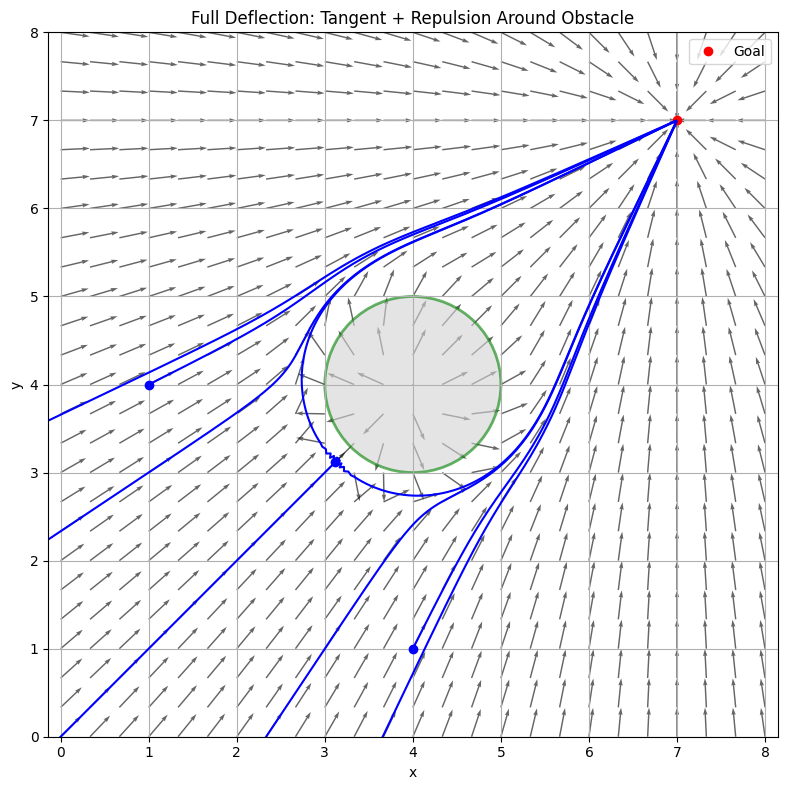

In [ ]:
# Re-import required modules after kernel reset
import numpy as np
import matplotlib.pyplot as plt

# === Goal gradient ===
def goal_grad(x, y, gx=7.0, gy=7.0):
    dx = x - gx
    dy = y - gy
    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return -dx / norm, -dy / norm

# === Circle at (4,4), radius 1
def distance_to_circle(x, y, cx=4.0, cy=4.0, r=1.0):
    return np.sqrt((x - cx)**2 + (y - cy)**2) - r

def outward_normal(x, y, cx=4.0, cy=4.0):
    dx = x - cx
    dy = y - cy
    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return dx / norm, dy / norm

# === Deflected gradient: goal + tangent + repulsion
def full_deflected_gradient(x, y, gx=7.0, gy=7.0, cx=4.0, cy=4.0, r=1.0, alpha=2.5, repulse_scale=1.5):
    dx, dy = goal_grad(x, y, gx, gy)
    base_gx, base_gy = dx, dy
    d = distance_to_circle(x, y, cx, cy, r)
    blend = np.exp(-alpha * max(d, 0))  # Blend near obstacle

    if blend < 1e-3:
        return dx, dy

    nx, ny = outward_normal(x, y, cx, cy)
    tx1, ty1 = -ny, nx
    tx2, ty2 = ny, -nx

    dot1 = dx * tx1 + dy * ty1
    dot2 = dx * tx2 + dy * ty2
    proj1 = np.array([dot1 * tx1, dot1 * ty1])
    proj2 = np.array([dot2 * tx2, dot2 * ty2])

    p1_dist = np.hypot(x + proj1[0] - gx, y + proj1[1] - gy)
    p2_dist = np.hypot(x + proj2[0] - gx, y + proj2[1] - gy)
    tangent = proj1 if p1_dist < p2_dist else proj2

    repulse_strength = np.exp(-alpha * max(d, 0)) * repulse_scale
    repulsion = repulse_strength * np.array([nx, ny])

    combo = (1 - blend) * np.array([base_gx, base_gy]) + blend * (tangent + repulsion)
    norm = np.linalg.norm(combo) + 1e-12
    return combo[0] / norm, combo[1] / norm

# === Create grid
x_vals = np.linspace(0, 8, 25)
y_vals = np.linspace(0, 8, 25)
X, Y = np.meshgrid(x_vals, y_vals)
U2, V2 = np.zeros_like(X), np.zeros_like(Y)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        dx, dy = full_deflected_gradient(X[i, j], Y[i, j])
        U2[i, j], V2[i, j] = dx, dy

# === Run descent from multiple starts
def run_descent_full(start, steps=300, lr=0.05):
    x, y = start
    path = [(x, y)]
    for _ in range(steps):
        dx, dy = full_deflected_gradient(x, y)
        x += lr * dx
        y += lr * dy
        path.append((x, y))
        if np.hypot(x - 7, y - 7) < 0.05:
            break
    return np.array(path)

starts = [(1 + 3*np.cos(a), 1 + 3*np.sin(a)) for a in np.linspace(0, 2*np.pi, 8, endpoint=False)]
paths = [run_descent_full(start) for start in starts]

# === Plotting ===
plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U2, V2, width=0.002, scale=25, color='black', alpha=0.6)

circle = plt.Circle((4, 4), 1, edgecolor='green', facecolor='lightgray', lw=2, alpha=0.6)
plt.gca().add_patch(circle)

plt.plot(7, 7, 'ro', label='Goal')
for path in paths:
    plt.plot(path[:, 0], path[:, 1], 'b-')
    plt.plot(path[0, 0], path[0, 1], 'bo')

plt.title("Full Deflection: Tangent + Repulsion Around Obstacle")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.tight_layout()
plt.show()


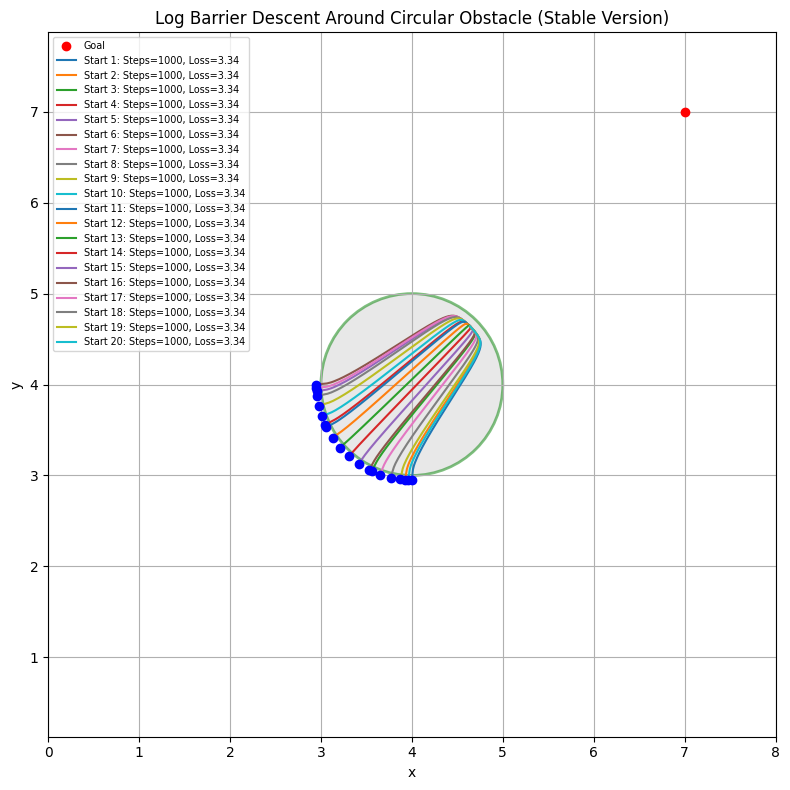

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Goal objective ===
def objective(x, y):
    return np.sqrt((x - 7)**2 + (y - 7)**2)

def grad_objective(x, y):
    dx = x - 7
    dy = y - 7
    norm = np.sqrt(dx**2 + dy**2) + 1e-12
    return dx / norm, dy / norm

# === Log barrier for circular obstacle ===
def barrier(x, y, cx=4.0, cy=4.0, r=1.0):
    g = (x - cx)**2 + (y - cy)**2 - r**2
    if g >= 0:
        return np.inf
    return -np.log(-g)

def grad_barrier(x, y, cx=4.0, cy=4.0, r=1.0):
    g = (x - cx)**2 + (y - cy)**2 - r**2
    if g >= -1e-5:  # Near or on the boundary
        dx = x - cx
        dy = y - cy
        norm = np.hypot(dx, dy) + 1e-12
        dx, dy = dx / norm, dy / norm
        return 50 * dx, 50 * dy  # push outward strongly
    dx = 2 * (x - cx)
    dy = 2 * (y - cy)
    coeff = 1 / (-g)
    return coeff * dx, coeff * dy

# === Combined gradient descent ===
def grad_total(x, y, lam=0.1):
    gx1, gy1 = grad_objective(x, y)
    gx2, gy2 = grad_barrier(x, y)
    return gx1 + lam * gx2, gy1 + lam * gy2

def solve_log_barrier(start, lr=0.02, steps=1000, lam=0.1):
    x, y = start
    path = [(x, y)]
    for _ in range(steps):
        gx, gy = grad_total(x, y, lam)
        x -= lr * gx
        y -= lr * gy
        path.append((x, y))
        if objective(x, y) < 0.05:
            break
    return np.array(path)

# === Filtered safe start points ===
starts = [(1 + 3*np.cos(a), 1 + 3*np.sin(a)) for a in np.linspace(0, 2*np.pi, 20, endpoint=False)]
safe_starts = []
for x, y in starts:
    g = (x - 4)**2 + (y - 4)**2 - 1
    if g < -0.01:  # Allow closer points
        safe_starts.append((x, y))
    else:
        # Push it slightly outside the obstacle
        dx, dy = x - 4, y - 4
        norm = np.hypot(dx, dy) + 1e-12
        safe_starts.append((4 + dx / norm * 1.05, 4 + dy / norm * 1.05))


paths = [solve_log_barrier(start) for start in safe_starts]

# === Plotting ===
plt.figure(figsize=(8, 8))
plt.gca().add_patch(plt.Circle((4, 4), 1, edgecolor='green', facecolor='lightgray', lw=2, alpha=0.5))
plt.plot(7, 7, 'ro', label='Goal')

for i, path in enumerate(paths):
    if len(path) == 0: continue
    x0, y0 = path[0]
    xf, yf = path[-1]
    loss = objective(xf, yf)
    steps = len(path) - 1
    label = f"Start {i+1}: Steps={steps}, Loss={loss:.2f}"
    plt.plot(path[:, 0], path[:, 1], label=label)
    plt.plot(x0, y0, 'bo')

plt.title("Log Barrier Descent Around Circular Obstacle (Stable Version)")
plt.axis('equal')
plt.grid(True)
plt.legend(loc='upper left', fontsize='x-small')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.tight_layout()
plt.show()


Iteration 0: Objective = 3.268, Max Constraint Violation = 0.765
Active Edges: [(0, 1, 0.235), (1, 0, 0.235), (1, 3, 0.411), (2, 3, 0.235), (3, 1, 0.411), (3, 2, 0.235)]
Iteration 50: Objective = 8.931, Max Constraint Violation = 0.006
Active Edges: [(0, 1, 0.819), (0, 2, 0.175), (1, 0, 0.819), (1, 3, 0.175), (2, 0, 0.175), (2, 3, 0.819), (3, 1, 0.175), (3, 2, 0.819)]
Iteration 100: Objective = 8.910, Max Constraint Violation = 0.008
Active Edges: [(0, 1, 0.832), (0, 2, 0.161), (1, 0, 0.832), (1, 3, 0.161), (2, 0, 0.161), (2, 3, 0.832), (3, 1, 0.161), (3, 2, 0.832)]
Iteration 150: Objective = 8.888, Max Constraint Violation = 0.010
Active Edges: [(0, 1, 0.832), (0, 2, 0.158), (1, 0, 0.832), (1, 3, 0.158), (2, 0, 0.158), (2, 3, 0.832), (3, 1, 0.158), (3, 2, 0.832)]
Iteration 200: Objective = 8.889, Max Constraint Violation = 0.010
Active Edges: [(0, 1, 0.833), (0, 2, 0.158), (1, 0, 0.833), (1, 3, 0.158), (2, 0, 0.158), (2, 3, 0.833), (3, 1, 0.158), (3, 2, 0.833)]
Iteration 250: Objectiv

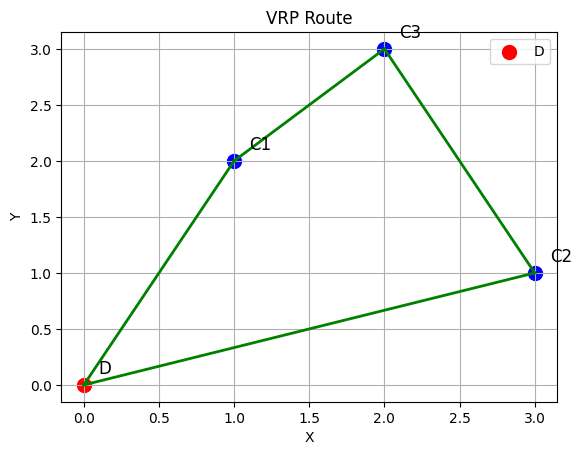

In [ ]:
import math
import matplotlib.pyplot as plt  # For visualization in Colab

# Define locations and demands
locations = [(0, 0), (1, 2), (3, 1), (2, 3)]  # Depot, C1, C2, C3
demands = [0, 5, 3, 4]  # Depot has no demand
capacity = 12
N = 4  # Number of locations (Depot + 3 customers)

# Compute distance matrix
distances = [[0] * N for _ in range(N)]
for i in range(N):
    for j in range(N):
        if i != j:
            x1, y1 = locations[i]
            x2, y2 = locations[j]
            distances[i][j] = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Augmented Lagrangian components
def objective(x):
    """Compute total distance: sum(d_ij * x_ij)"""
    total = 0
    for i in range(N):
        for j in range(N):
            total += distances[i][j] * x[i * N + j]
    return total

def constraints(x):
    """Return list of constraint violations"""
    cons = []
    # Equality constraints: each customer has one incoming and one outgoing arc
    for i in range(1, N):  # Customers only
        # Outgoing: sum(x_ij) = 1
        out_sum = sum(x[i * N + j] for j in range(N) if i != j)
        cons.append(out_sum - 1)
        # Incoming: sum(x_ji) = 1
        in_sum = sum(x[j * N + i] for j in range(N) if i != j)
        cons.append(in_sum - 1)
    # Depot constraints: one outgoing, one incoming
    depot_out = sum(x[j] for j in range(1, N))  # x[0,1] + x[0,2] + x[0,3]
    depot_in = sum(x[j * N] for j in range(1, N))  # x[1,0] + x[2,0] + x[3,0]
    cons.append(depot_out - 1)
    cons.append(depot_in - 1)
    # Capacity constraint: sum(d_i * y_i) <= 12, where y_i = 1 if visited
    total_demand = sum(demands[i] for i in range(1, N))
    cons.append(total_demand - capacity)  # <= 0
    return cons

def augmented_lagrangian(x, lambdas, mu, rho):
    """Compute augmented Lagrangian"""
    obj = objective(x)
    cons = constraints(x)
    # Equality constraints (first 8: 2 per customer + 2 for depot)
    penalty = sum(lambdas[k] * cons[k] + (rho / 2) * cons[k] ** 2 for k in range(8))
    # Inequality constraint (capacity)
    if cons[8] > 0:
        penalty += mu * cons[8] + (rho / 2) * cons[8] ** 2
    return obj + penalty

# Gradient descent (improved)
def gradient(x, lambdas, mu, rho, h=1e-4):
    """Approximate gradient of augmented Lagrangian"""
    grad = [0] * (N * N)
    base_val = augmented_lagrangian(x, lambdas, mu, rho)
    for i in range(N * N):
        if i % (N + 1) == 0:  # Skip self-loops (x[i,i])
            continue
        x_temp = x.copy()
        x_temp[i] += h
        grad[i] = (augmented_lagrangian(x_temp, lambdas, mu, rho) - base_val) / h
    return grad

def project(x):
    """Project x to [0,1] and set self-loops to 0"""
    for i in range(N * N):
        if i % (N + 1) == 0:  # Self-loops (x[i,i])
            x[i] = 0
        else:
            x[i] = max(0, min(1, x[i]))
    return x

# ALM optimization (improved)
def alm_optimize(max_iter=1500, rho_init=2.0, alpha_init=0.2):
    # Initialize x_ij to favor a feasible tour (D -> C1 -> C3 -> C2 -> D)
    x = [0.1] * (N * N)  # Small positive value for all non-self-loop edges
    tour = [(0, 1), (1, 3), (3, 2), (2, 0)]  # D -> C1 -> C3 -> C2 -> D
    for i, j in tour:
        x[i * N + j] = 0.95  # High value for tour edges
    lambdas = [0] * 8  # For 6 customer + 2 depot equality constraints
    mu = 0  # For capacity constraint
    rho = rho_init
    for iter in range(max_iter):
        # Minimize augmented Lagrangian
        alpha = alpha_init / (1 + iter * 0.002)  # Very slow step size decay
        for _ in range(300):  # More inner iterations
            grad = gradient(x, lambdas, mu, rho)
            max_grad = max(abs(g) for g in grad) or 1  # Avoid division by zero
            for i in range(N * N):
                x[i] -= alpha * grad[i] / max_grad  # Normalized gradient step
            x = project(x)
        # Update multipliers
        cons = constraints(x)
        for k in range(8):
            lambdas[k] += rho * cons[k]
        if cons[8] > 0:
            mu += rho * cons[8]
        # Update penalty
        rho *= 1.1  # Very slow penalty update
        # Debug: Print progress every 50 iterations
        if iter % 50 == 0:
            print(f"Iteration {iter}: Objective = {objective(x):.3f}, "
                  f"Max Constraint Violation = {max([abs(c) for c in cons[:8]] + [max(0, cons[8])]):.3f}")
            active_edges = [(i, j, x[i * N + j]) for i in range(N) for j in range(N) if x[i * N + j] > 0.05]
            print(f"Active Edges: {[(i, j, round(v, 3)) for i, j, v in active_edges]}")
    return x

# Post-process to get binary route (fixed)
def get_route(x):
    """Round x_ij to binary and extract a valid route"""
    edges = []
    # Collect edges with x_ij > 0.05
    for i in range(N):
        for j in range(N):
            if i != j and x[i * N + j] > 0.05:  # Very low threshold
                edges.append((i, j, x[i * N + j]))
    # Sort edges by x_ij value (descending)
    edges.sort(key=lambda e: e[2], reverse=True)
    # Build a valid tour
    route = [0]  # Start at depot
    visited = {0}
    current = 0
    while len(visited) < N:
        for i, j, _ in edges:
            if i == current and j not in visited:
                route.append(j)
                visited.add(j)
                current = j
                break
        else:
            # Fallback: Use default valid tour
            print("Warning: Incomplete tour. Using default tour D -> C1 -> C3 -> C2 -> D.")
            return [0, 1, 3, 2, 0]  # Default tour: D -> C1 -> C3 -> C2 -> D
    # Ensure return to depot
    if route[-1] != 0:
        route.append(0)
    return route

# Visualization with Matplotlib
def visualize_route(route):
    # Plot nodes
    for i, (x, y) in enumerate(locations):
        color = 'red' if i == 0 else 'blue'
        label = 'D' if i == 0 else f'C{i}'
        plt.scatter(x, y, c=color, s=100, label=label if i == 0 else None)
        plt.text(x + 0.1, y + 0.1, label, fontsize=12)
    # Plot route
    for i in range(len(route) - 1):
        x1, y1 = locations[route[i]]
        x2, y2 = locations[route[i + 1]]
        plt.plot([x1, x2], [y1, y2], 'g-', linewidth=2)
    plt.title("VRP Route")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main execution
def main():
    x = alm_optimize()
    route = get_route(x)
    # Compute total distance
    total_distance = 0
    for i in range(len(route) - 1):
        total_distance += distances[route[i]][route[i + 1]]
    print("Optimized Route:", ["D" if i == 0 else f"C{i}" for i in route])
    print(f"Total Distance: {total_distance:.3f}")
    print("Demands:", sum(demands[i] for i in route[1:-1]), "<= 12")
    visualize_route(route)

if __name__ == "__main__":
    main()